In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Présentation de la base de données

La base de données "UCI_Credit_Card" est un ensemble de données fourni par l'Université de Californie, Irvine (UCI) via leur répertoire Machine Learning. Elle comprend **30 000 instances** représentant des informations sur le crédit et le comportement de paiement des clients d'une banque taïwanaise. Cet ensemble de données est largement utilisé pour analyser les défauts de paiement et développer des modèles prédictifs.

L'ensemble de données peut être téléchargé à partir du lien suivant :
- [UCI Machine Learning Repository - Default of Credit Card Clients](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

### Structure de la base de données
Dans notre implémentation, les données ont été stockées dans une base de données relationnelle MySQL, réparties en cinq tables distinctes. 
1. **users**  :
   - Contient les informations démographiques et de crédit des clients.
   - Colonnes :
     - `id` (INT, clé primaire) : Identifiant unique du client.
     - `limit_bal` (FLOAT) : Montant du crédit accordé (en dollars NT).
     - `sex` (INT) : Genre (1 = masculin, 2 = féminin).
     - `education` (INT) : Niveau d'éducation (1 = études supérieures, 2 = université, 3 = lycée, 4 = autres).
     - `marriage` (INT) : État matrimonial (1 = marié, 2 = célibataire, 3 = autres).
     - `age` (INT) : Âge en années.

2. **payment_status**  :
   - Contient les statuts de remboursement mensuels pour chaque client.
   - Colonnes :
     - `status_id` (INT, clé primaire, auto-incrémenté) : Identifiant unique du statut.
     - `user_id` (INT, clé étrangère) : Référence à `users(id)`.
     - `month_offset` (INT) : Index du mois (0 à 5, où 0 = septembre, 1 = août, ..., 5 = avril).
     - `status` (INT) : Statut de remboursement (-1 = payé à temps, 0 = payé en retard, 1 = retard d’un mois, ..., 9 = retard de neuf mois ou plus).

3. **bill_amounts**  :
   - Contient les montants des factures mensuelles pour chaque client.
   - Colonnes :
     - `bill_id` (INT, clé primaire, auto-incrémenté) : Identifiant unique de la facture.
     - `user_id` (INT, clé étrangère) : Référence à `users(id)`.
     - `month_offset` (INT) : Index du mois (1 à 6, où 1 = septembre, 2 = août, ..., 6 = avril).
     - `amount` (FLOAT) : Montant de la facture (en dollars NT).

4. **payment_amounts**  :
   - Contient les montants des paiements mensuels effectués par chaque client.
   - Colonnes :
     - `payment_id` (INT, clé primaire, auto-incrémenté) : Identifiant unique du paiement.
     - `user_id` (INT, clé étrangère) : Référence à `users(id)`.
     - `month_offset` (INT) : Index du mois (1 à 6, où 1 = septembre, 2 = août, ..., 6 = avril).
     - `amount` (FLOAT) : Montant du paiement (en dollars NT).

5. **default_status**  :
   - Contient l’indicateur de défaut de paiement pour le mois suivant.
   - Colonnes :
     - `default_id` (INT, clé primaire, auto-incrémenté) : Identifiant unique du statut de défaut.
     - `user_id` (INT, clé étrangère) : Référence à `users(id)`.
     - `default_payment_next_month` (INT) : Indicateur de défaut (1 = défaut, 0 = pas de défaut).


Pour reconstruire le dataset original, un script Python effectue des jointures SQL entre ces tables, pivote les données mensuelles pour recréer les colonnes `PAY_0`, `PAY_2` à `PAY_6`, `BILL_AMT1` à `BILL_AMT6`, et `PAY_AMT1` à `PAY_AMT6`, et sauvegarde le résultat dans un fichier CSV.

## Problématique

L’objectif principal est de **prédire si un client sera en défaut de paiement le mois suivant** en utilisant les informations démographiques, de crédit, et de comportement de paiement. Il s’agit d’un problème de **classification binaire** où la variable cible `default.payment.next.month` prend les valeurs :
- **1** : Le client sera en défaut de paiement.
- **0** : Le client ne sera pas en défaut.


## Description des variables

Les variables explicatives, extraites des tables normalisées, sont les suivantes :

1. **ID** (`users.id`) : Identifiant unique attribué à chaque client.

2. **LIMIT_BAL** (`users.limit_bal`) : Montant du crédit accordé en dollars NT (inclut le crédit à la consommation individuel et le crédit familial/supplémentaire).

3. **SEX** (`users.sex`) : Genre du client (1 = masculin, 2 = féminin).

4. **EDUCATION** (`users.education`) : Niveau d'éducation du client (1 = études supérieures, 2 = université, 3 = lycée, 4 = autres).

5. **MARRIAGE** (`users.marriage`) : État matrimonial du client (1 = marié, 2 = célibataire, 3 = autres).

6. **AGE** (`users.age`) : Âge du client en années.

7. **PAY_0 à PAY_6** (`payment_status.status`) : Statut de remboursement de septembre (PAY_0) à avril (PAY_6). Les valeurs possibles sont :
   - **-1** : Payé à temps.
   - **0** : Payé en retard.
   - **1 à 9** : Retard de paiement de 1 à 9 mois ou plus.

8. **BILL_AMT1 à BILL_AMT6** (`bill_amounts.amount`) : Montant de la facture en dollars NT (relevé de facture) de septembre (BILL_AMT1) à avril (BILL_AMT6).

9. **PAY_AMT1 à PAY_AMT6** (`payment_amounts.amount`) : Montant des paiements effectués en dollars NT de septembre (PAY_AMT1) à avril (PAY_AMT6).

La variable cible est **default.payment.next.month** (`default_status.default_payment_next_month`), qui indique si le client sera en défaut de paiement le mois suivant (1 = oui, 0 = non).

##  Importation  et description des donnees

In [ ]:
from utils.load_from_credit_card_db import mysql_to_csv
db_config = {
        'host': 'localhost',
        'database': 'credit_card_db',
        'user': 'root',
        'password': ''
    }

mysql_to_csv(
    db_config=db_config,
    output_csv_file='./UCI_Credit_Card_reconstructed.csv'
)
df = pd.read_csv('UCI_Credit_Card_reconstructed.csv')

TypeError: mysql_to_csv() got an unexpected keyword argument 'table_name'

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Afficher les types de chaque variable 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

#### Analyse des variables --

In [9]:
# Analyse des valeurs manquantes 
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

* Aucune valeur manquantes pour tout les champs 

In [10]:
# Variables quantitatives à afficher
quant_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
              'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 
              'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


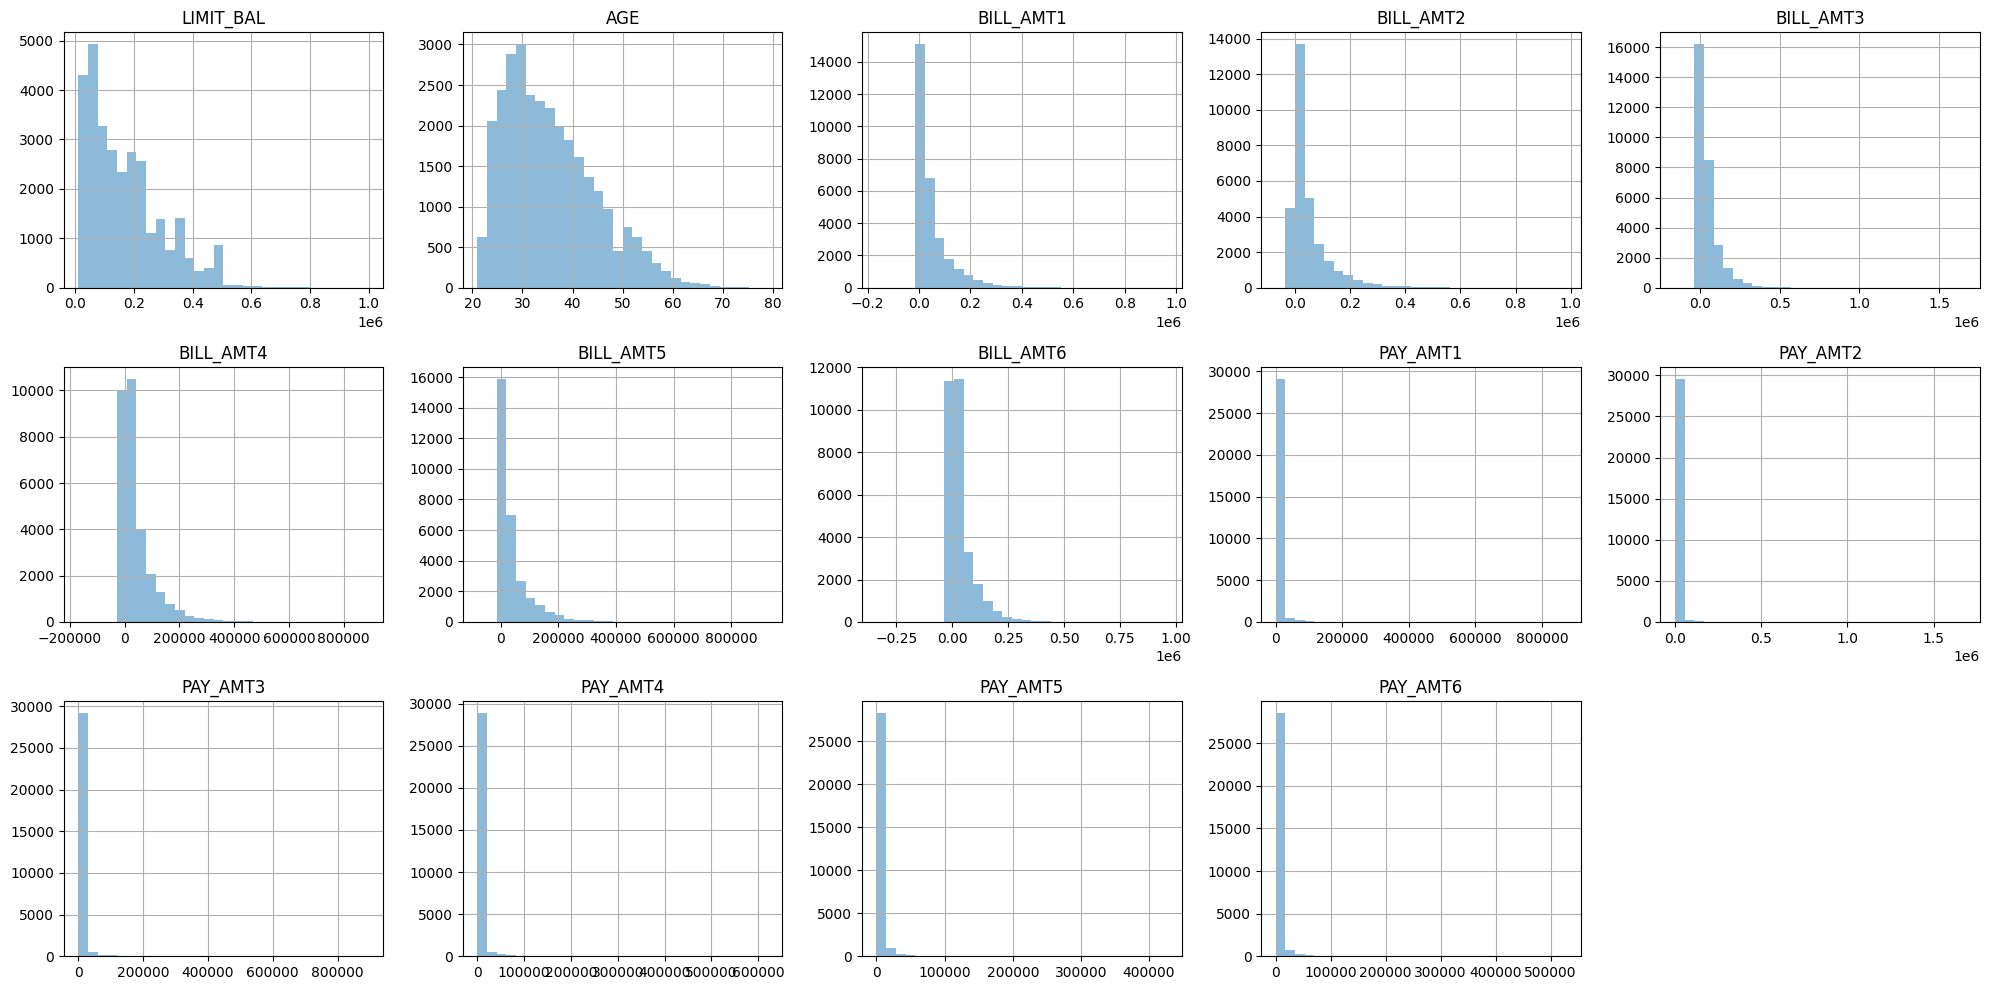

In [11]:
plt.figure(figsize=(20,10))

for i, var in enumerate(quant_vars):
    plt.subplot(3, 5, i+1)
    df[var].hist(bins=30, alpha=0.5)
    plt.title(var)

plt.tight_layout()
plt.show()

In [12]:
# Variables qualitatives à afficher avec leurs significations respectives
qual_vars = ['SEX', 'EDUCATION', 'MARRIAGE', 'default.payment.next.month']
labels = {
    'SEX': {1: 'Homme', 2: 'Femme'},
    'EDUCATION': {1: 'École supérieure', 2: 'Université', 3: 'Lycée', 4: 'Autres',5:'Autres',6:'Autres',0:'Autres'},
    'MARRIAGE': {1: 'Marié', 2: 'Célibataire', 3: 'Autres',0:'Autres'},
    'default.payment.next.month': {0: 'Pas de défaut', 1: 'Défaut'}
}

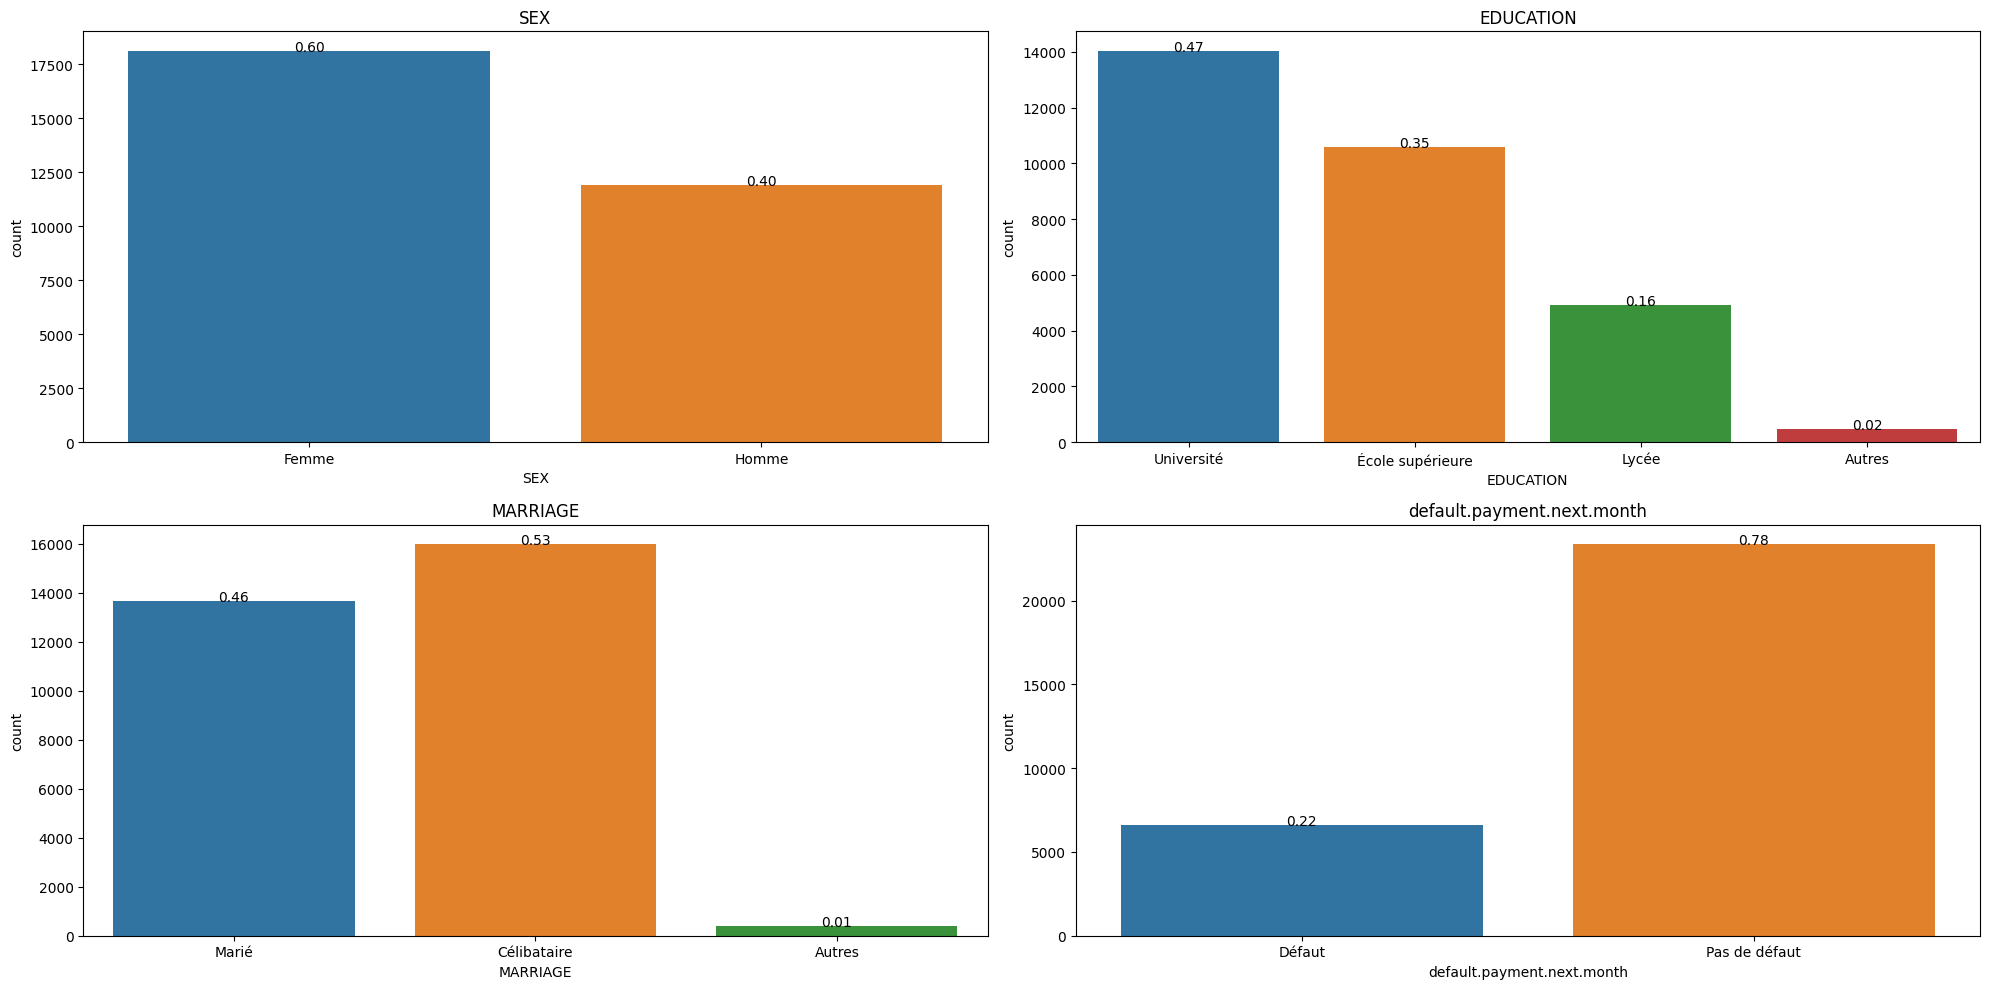

In [13]:
df_copy = df.copy()
df_copy.replace(labels, inplace=True)

plt.figure(figsize=(20,10))

for i, var in enumerate(qual_vars):
    plt.subplot(2, 2, i+1)
    ax = sns.countplot(data=df_copy, x=var, legend=False, hue=var)
    plt.title(var)

    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total),
                ha="center") 

# Afficher la figure
plt.tight_layout()
plt.show()

#### Analyse bivariees : Quel est la relations qui existe entre le fait de faire defaut  et l'ensemble des variable ? 

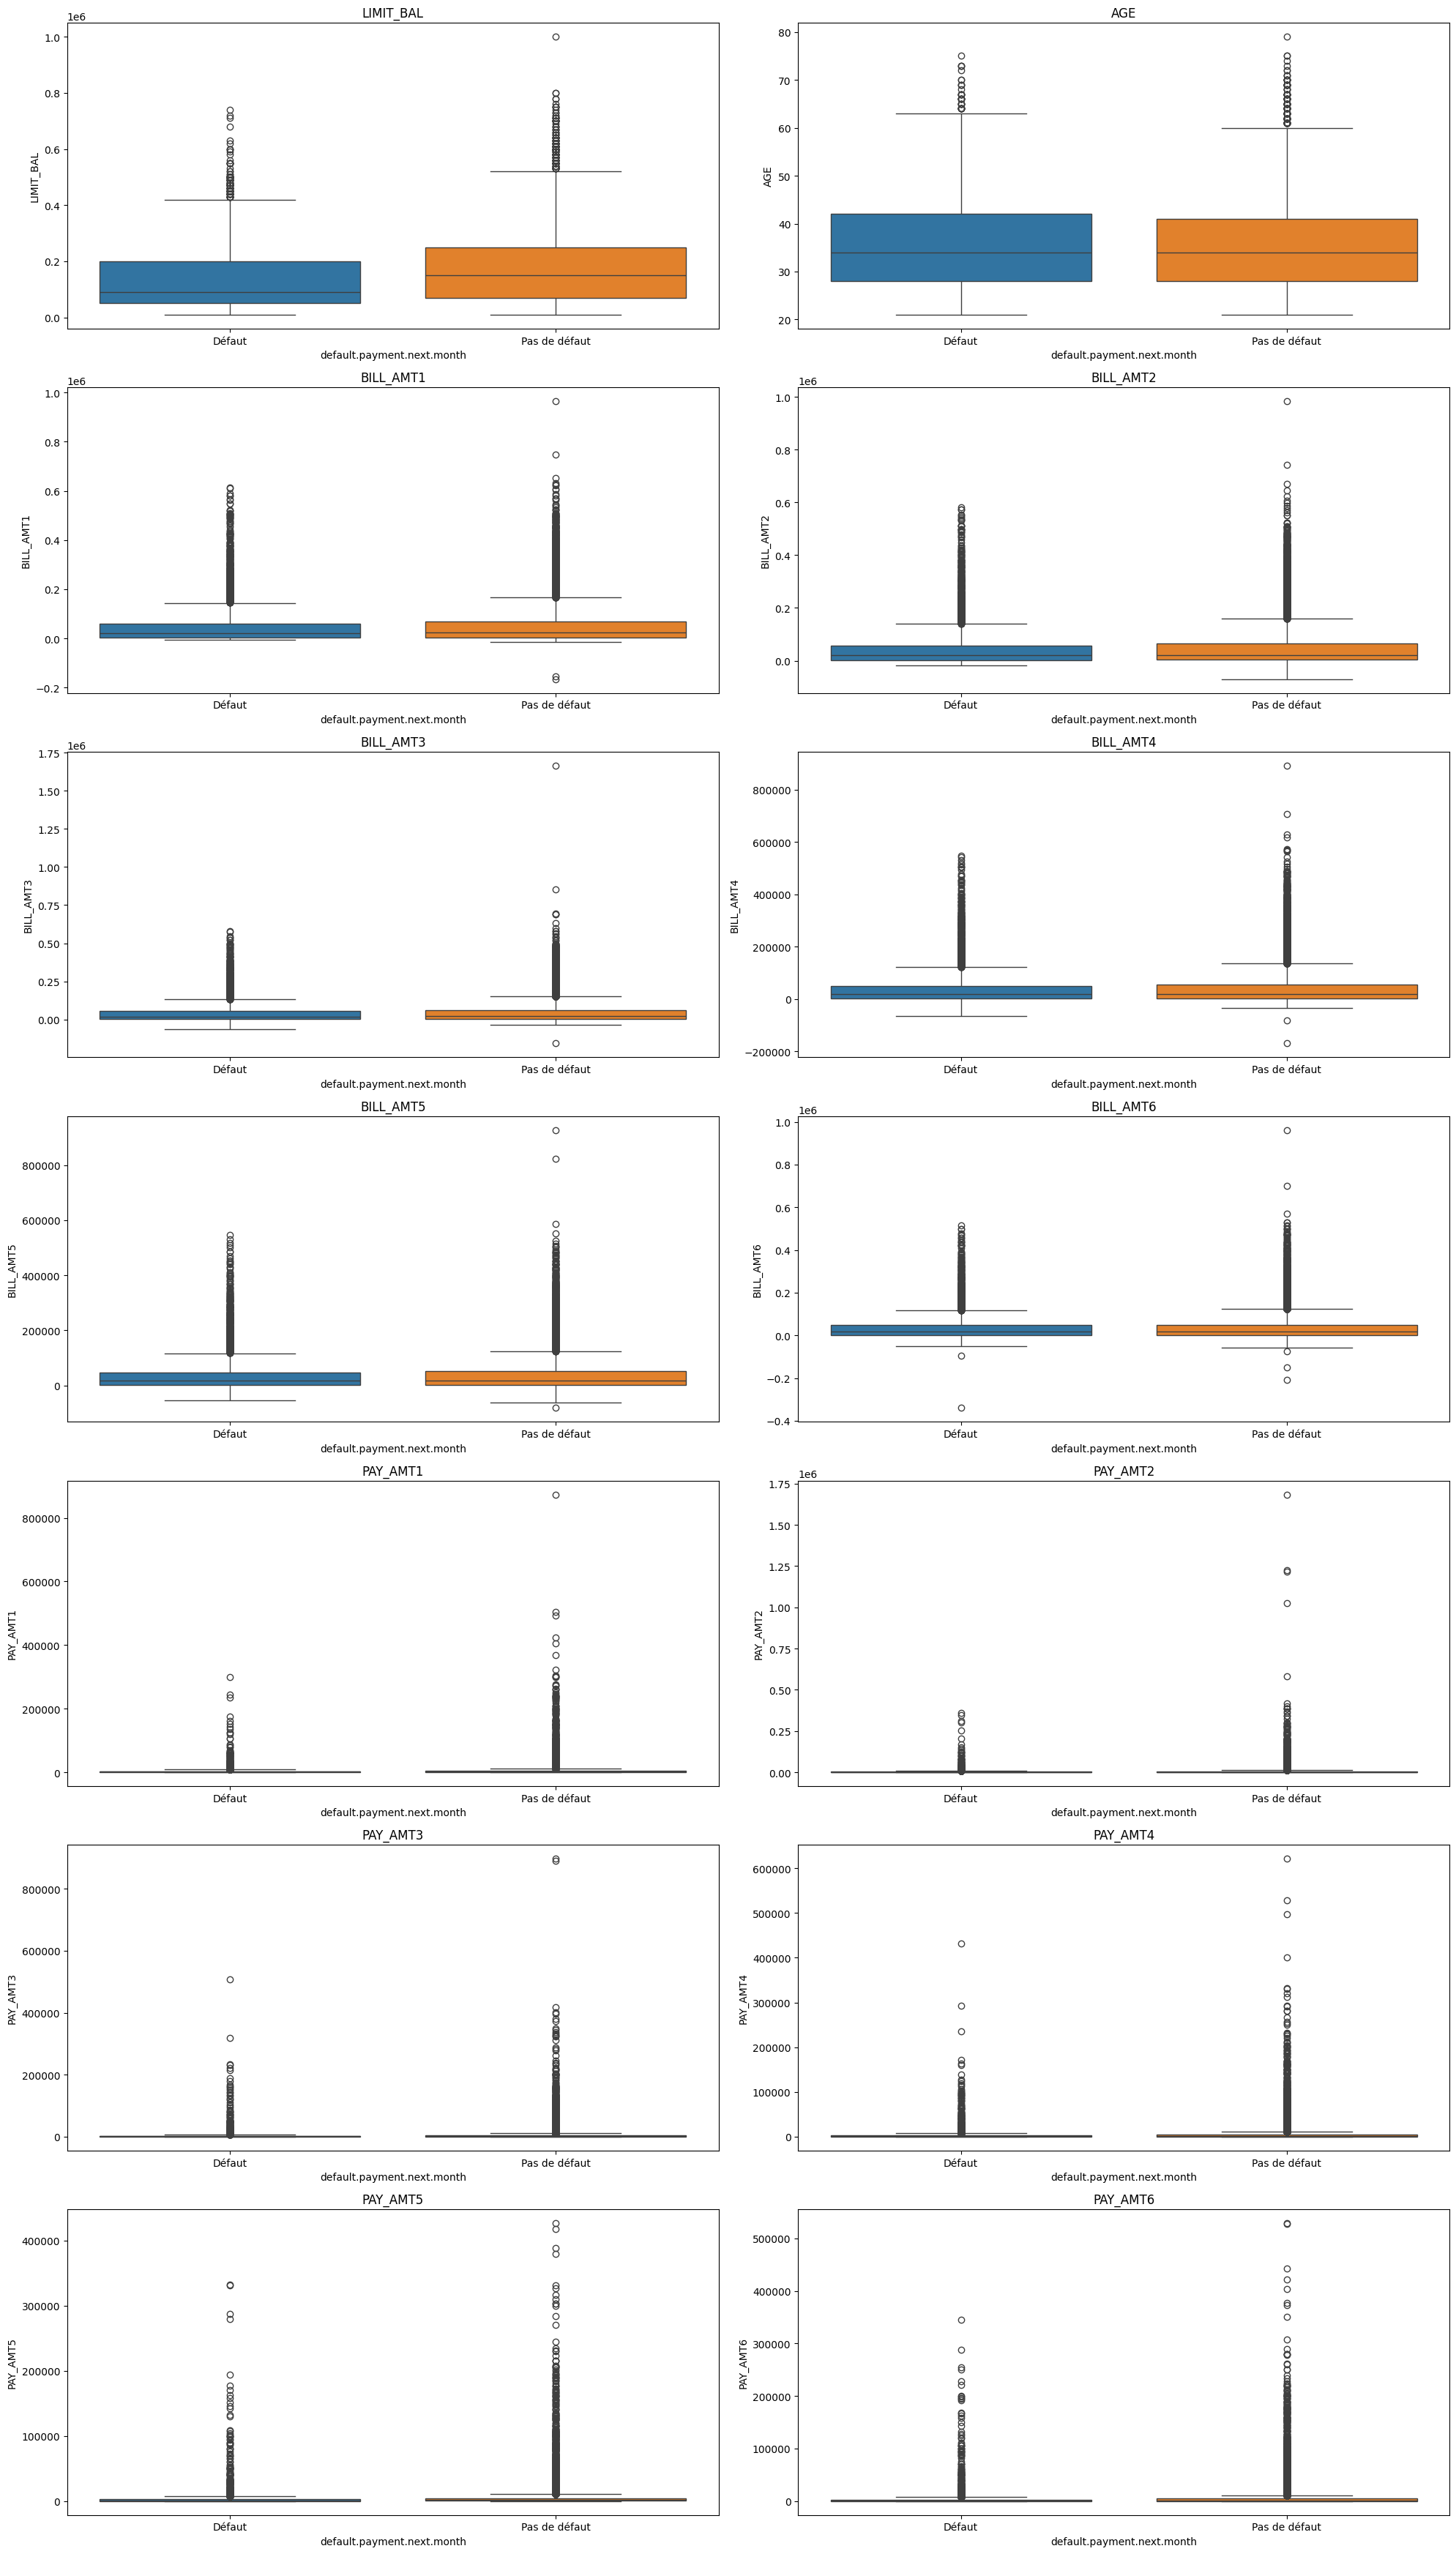

In [14]:
plt.figure(figsize=(20,35))

for i, var in enumerate(quant_vars):
    plt.subplot(7, 2, i+1)
    sns.boxplot(data = df_copy, x = 'default.payment.next.month', y = var, legend=False, hue='default.payment.next.month')
    plt.title(var)

plt.tight_layout()
plt.show()

#### Test de Kruskal Wallis pour determiner les variables les plus significatives 

In [15]:
from scipy.stats import kruskal

test_stats = []
p_values = []
for var in quant_vars:
    groups = [df[var][df['default.payment.next.month'] == 0],
              df[var][df['default.payment.next.month'] == 1]]
    test_stat, p_value = kruskal(*groups)
    test_stats.append(test_stat)
    p_values.append(p_value)

ranking_df = pd.DataFrame({'Variable': quant_vars, 'Test Statistic': test_stats, 'p-value': p_values})
ranking_df.sort_values('Test Statistic', ascending=False, inplace=True)

print(ranking_df)

     Variable  Test Statistic        p-value
0   LIMIT_BAL      862.756409  1.225520e-189
8    PAY_AMT1      772.715560  4.616556e-170
9    PAY_AMT2      683.802429  9.954766e-151
10   PAY_AMT3      582.851233  8.992533e-129
11   PAY_AMT4      491.339268  7.284564e-109
13   PAY_AMT6      442.441975   3.184062e-98
12   PAY_AMT5      407.762871   1.124851e-90
2   BILL_AMT1       19.242804   1.151034e-05
3   BILL_AMT2        7.257338   7.061188e-03
4   BILL_AMT3        4.815637   2.820264e-02
5   BILL_AMT4        2.095146   1.477676e-01
6   BILL_AMT5        1.408132   2.353667e-01
1         AGE        0.795297   3.725031e-01
7   BILL_AMT6        0.000174   9.894802e-01


#### Graphique de classements 

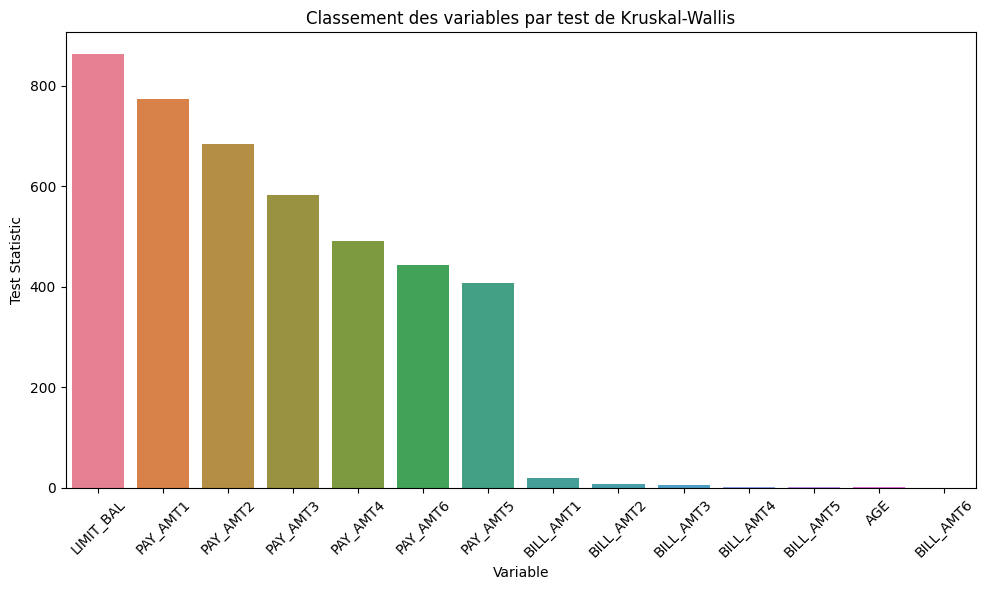

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ranking_df, x='Variable', y='Test Statistic', legend=False, hue='Variable')
plt.xticks(rotation=45)
plt.xlabel('Variable')
plt.ylabel('Test Statistic')
plt.title('Classement des variables par test de Kruskal-Wallis')
plt.tight_layout()
plt.show()

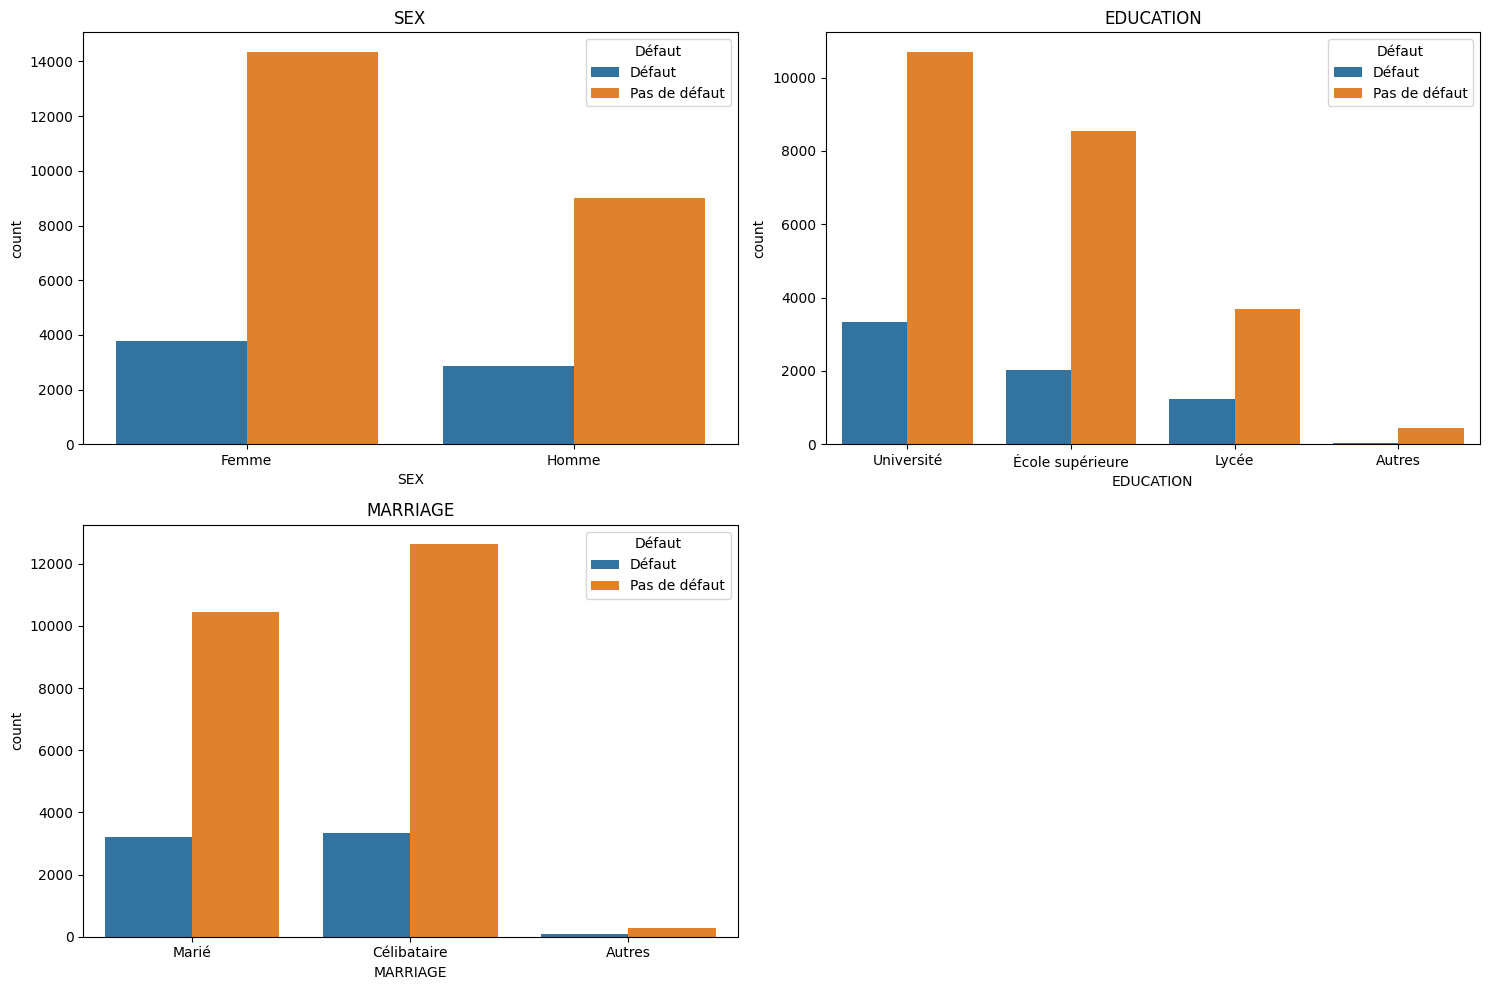

In [17]:
qual_vars = ['SEX', 'EDUCATION', 'MARRIAGE']


plt.figure(figsize=(15, 10))

for i, var in enumerate(qual_vars):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df_copy, x=var, hue='default.payment.next.month')
    plt.title(var)
    plt.legend(title='Défaut')

plt.tight_layout()

plt.show()

## Préparation des données

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler

X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

# Encodage One-Hot des variables qualitatives
X_encoded = pd.get_dummies(X, columns=qual_vars, drop_first=True)
X_encoded.describe(include="all")

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,True,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18112,19415,15970,25083,29877,29720,29949,16341,15964,29677
mean,15000.500000,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8660.398374,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
X_encoded.isnull().sum()

ID             0
LIMIT_BAL      0
AGE            0
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
SEX_2          0
EDUCATION_1    0
EDUCATION_2    0
EDUCATION_3    0
EDUCATION_4    0
EDUCATION_5    0
EDUCATION_6    0
MARRIAGE_1     0
MARRIAGE_2     0
MARRIAGE_3     0
dtype: int64

#### Diviser les donnees en ensemble d'entrainement et de test 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#### Scaling des donnees quentitatives (Mise a l'echelle des variables)

In [21]:
X_train_quant = X_train[quant_vars]

scaler = StandardScaler()

X_train_quant_scaled = scaler.fit_transform(X_train_quant)
X_train_scaled = pd.DataFrame(X_train_quant_scaled, columns=quant_vars).reset_index(drop=True)

X_train_nonquant = X_train.drop(quant_vars, axis=1).reset_index(drop=True)

X_train_encoded = pd.concat([X_train_scaled, X_train_nonquant], axis=1)
X_train_encoded.set_index('ID', inplace=True)

#####  Appliquer les parametres du StandarScaler sur les variables quantitatives de l'ensemble de test

In [22]:
X_test_quant_scaled = scaler.transform(X_test[quant_vars])

X_test_scaled = pd.DataFrame(X_test_quant_scaled, columns=quant_vars).reset_index(drop=True)
X_test_nonquant = X_test.drop(quant_vars, axis=1).reset_index(drop=True)
X_test_encoded = pd.concat([X_test_scaled, X_test_nonquant], axis=1)
X_test_encoded.set_index('ID', inplace=True)

## Création du modèle (SVM)

In [23]:
import time 
from sklearn.svm import SVC


In [24]:
svm_model = SVC()

start_time = time.time()
svm_model.fit(X_train_encoded, y_train)

end_time = time.time()
training_time = end_time - start_time

print(f"Temps d'entraînement du modèle : {training_time:.2f} secondes")


Temps d'entraînement du modèle : 83.70 secondes


## Prédiction et performance du modèle

In [25]:
y_test_pred = svm_model.predict(X_test_encoded)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, roc_auc_score
# Calculer les mesures d'évaluation pour l'ensemble de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, svm_model.decision_function(X_test_encoded))

In [27]:
evaluation_table = pd.DataFrame({
    'Métrique': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'Test': [test_accuracy, test_precision, test_recall, test_f1_score, test_auc]
})

print(evaluation_table)

    Métrique      Test
0   Accuracy  0.819167
1  Precision  0.673252
2     Recall  0.337395
3   F1 Score  0.449518
4        AUC  0.716037


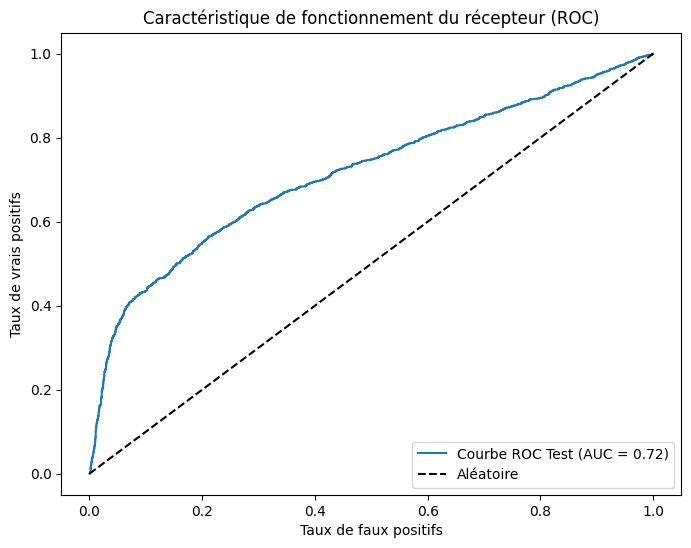

In [28]:
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, svm_model.decision_function(X_test_encoded))

auc_test = roc_auc_score(y_test, svm_model.decision_function(X_test_encoded))

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label='Courbe ROC Test (AUC = {:.2f})'.format(auc_test))
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Caractéristique de fonctionnement du récepteur (ROC)')
plt.legend(loc='lower right')
plt.show()

#### Optimisation des hyper parametres

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


param_grid = {
    'kernel': ['linear', 'poly'],
    'C': [0.1, 1],
    'degree': [2, 3],
    'gamma': ['scale', 'auto']
}

svm = SVC(probability=True)

start_time = time.time()

grid_search = RandomizedSearchCV(svm, param_grid, cv=2, scoring='accuracy', n_jobs=-1, random_state=42)
grid_search.fit(X_train_encoded, y_train)

end_time = time.time()

execution_time = end_time - start_time

print("Meilleurs paramètres :", grid_search.best_params_)
print(f"Temps d'exécution : {execution_time:.2f} secondes")


#### Meilleur parametre obtenu
* Kaggle 
  Meilleurs paramètres : {'kernel': 'poly', 'gamma': 'auto', 'degree': 2, 'C': 1}
  Temps d'exécution : 504.48 secondes

In [ ]:
best_params = grid_search.best_params_
best_model = SVC(**best_params)

start_time = time.time()
best_model.fit(X_train_encoded, y_train)

end_time = time.time()
training_time = end_time - start_time

print(f"Temps d'entraînement du modèle : {training_time:.2f} secondes")


##### Prediction 


In [ ]:
y_test_pred = best_model.predict(X_test_encoded)

In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, best_model.decision_function(X_test_encoded))

In [ ]:
evaluation_table = pd.DataFrame({
    'Métrique': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'Test': [test_accuracy, test_precision, test_recall, test_f1_score, test_auc]
})

print(evaluation_table)